# This part is still under developing

[Custom vs. Provided Leaf Data](https://www.kaggle.com/lorinc/leaf-classification/custom-vs-provided-leaf-data/comments)

[feature extraction v4](https://www.kaggle.com/lorinc/leaf-classification/feature-extraction-v4)


[Shapelets for time series classification](https://www.kaggle.com/group16/leaf-classification/shapelets/comments)



In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def weighted_img(img, initial_img, alpha=0.8, beta=1., gamma=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, alpha, img, beta, gamma)

## Pipeline to process a raw leaf image

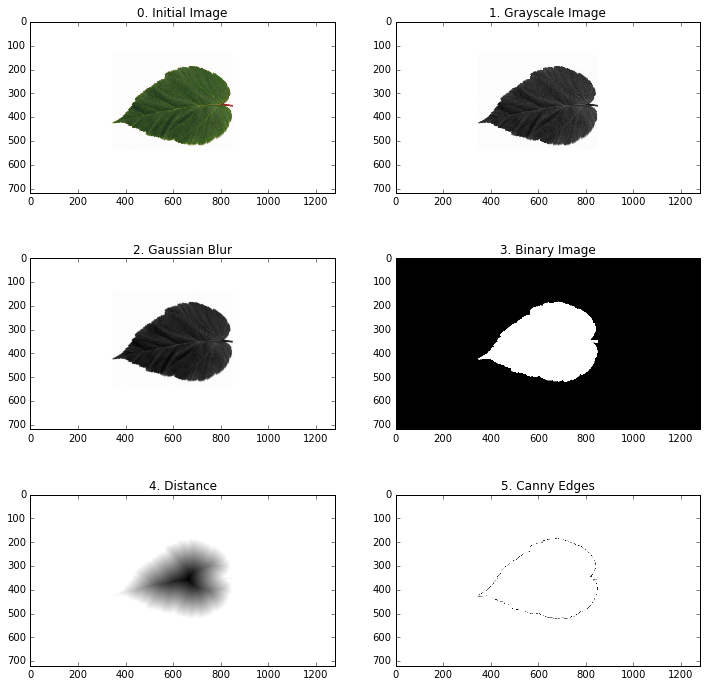

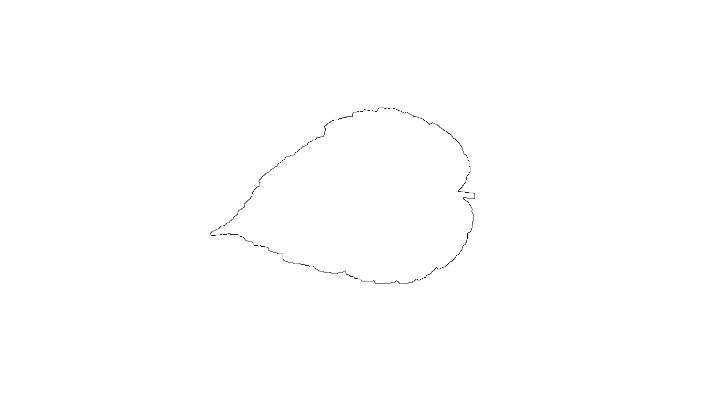

In [70]:
# Reading in an image
img_name = 'images_original/test_2.jpg'
img_init = mpimg.imread(img_name)
fig = plt.figure(num=None, figsize=(12, 12), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
row_subfig = 3
plt.subplot(row_subfig,2,1); plt.imshow(img_init); plt.title('0. Initial Image')

# Grayscale the initial image
img_gray = grayscale(img_init)
plt.subplot(row_subfig,2,2); plt.imshow(img_gray, cmap='gray'); plt.title('1. Grayscale Image')



# Gaussian
img_blur = gaussian_blur(img_gray, kernel_size=5)
plt.subplot(row_subfig,2,3); plt.imshow(img_blur, cmap='gray'); plt.title('2. Gaussian Blur')

# Binarization
ret,img_bin = cv2.threshold(img_blur, 220, 255, cv2.THRESH_BINARY_INV)
plt.subplot(row_subfig,2,4); plt.imshow(img_bin, cmap='gray'); plt.title('3. Binary Image')

# Distance transformation
img_dist = cv2.distanceTransform(img_bin, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
plt.subplot(row_subfig,2,5); plt.imshow(img_dist, cmap='gray_r'); plt.title('4. Distance')

# Canny edge detection
img_Canny = cv2.Canny(img_bin, 30, 100)
plt.subplot(row_subfig,2,6); plt.imshow(img_Canny, cmap='gray_r'); plt.title('5. Canny Edges')

# Fint Contours
contours, _ = cv2.findContours(img_Canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# overlay
#img_mixed = weighted_img(img_dist, img_init, alpha=0.8, beta=1., gamma=0.)
#plt.subplot(row_subfig,2,6); plt.imshow(img_mixed); plt.title('5. Mixed')    
    
'''
# Canny edge detection
img_edges = canny(img_bin, low_threshold=50, high_threshold=150)
plt.subplot(row_subfig,2,5); plt.imshow(img_edges, cmap='gray'); plt.title('4. Canny Edges')

'''

'''
# ROI selection
vertices = np.array([ [100,540], [445,320], [520, 320], [960,540] ])
img_lines = region_of_interest(img_edges, [vertices])
img_ROI = np.copy(img_init)
cv2.line(img_ROI, (vertices[0][0],vertices[0][1]), (vertices[1][0], vertices[1][1]), (255,0,0), thickness=2)
cv2.line(img_ROI, (vertices[2][0],vertices[2][1]), (vertices[1][0], vertices[1][1]), (255,0,0), thickness=2)
cv2.line(img_ROI, (vertices[2][0],vertices[2][1]), (vertices[3][0], vertices[3][1]), (255,0,0), thickness=2)
plt.subplot(row_subfig,2,5); plt.imshow(img_ROI); plt.title('4. ROI Selection')
plt.subplot(row_subfig,2,6); plt.imshow(img_lines, cmap='gray'); plt.title('5. ROI Mask on Canny Edges')

# Hough Transform to get the raw lines image
img_Hough = hough_lines(img_lines, rho=2, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20)
plt.subplot(row_subfig,2,7); plt.imshow(img_Hough); plt.title('6. Hough Transform'); 

# Hough Transform & lines averaging
img_lanes = hough_lines_avg(img_lines, rho=2, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20)
plt.subplot(row_subfig,2,8); plt.imshow(img_lanes); plt.title('7. Lane lines'); 

# overlay the detected line on the initial image
img_raw_lanes = weighted_img(img_Hough, img_init)
plt.subplot(row_subfig,2,9); plt.imshow(img_raw_lanes); plt.title('8. Raw Lines on Individule Image')

img_processed = weighted_img(img_lanes, img_init)
plt.subplot(row_subfig,2,10); plt.imshow(img_processed); plt.title('9. Lane Lines on Individule Image')

'''
plt.show()

fig = plt.figure(num=None, figsize=(12, 12), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.imshow(img_Canny, cmap='gray_r'); plt.axis('off');plt.show()

In [71]:
print '{} contour(s) is detected.'.format(len(contours))

1 contour(s) is detected.


362.203639941 639.242826693


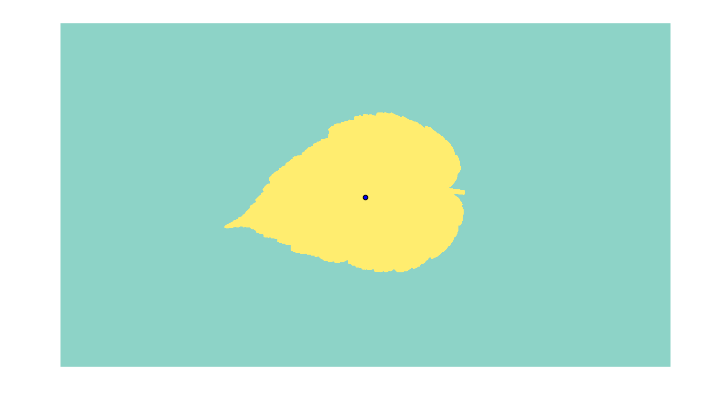

In [72]:
import scipy.ndimage as ndi
from skimage import measure
from pylab import rcParams

cy, cx = ndi.center_of_mass(img_bin)

print cy, cx
fig = plt.figure(num=None, figsize=(12, 12), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.imshow(img_bin, cmap='Set3'); plt.axis('off');

plt.scatter(cx, cy)

plt.show()

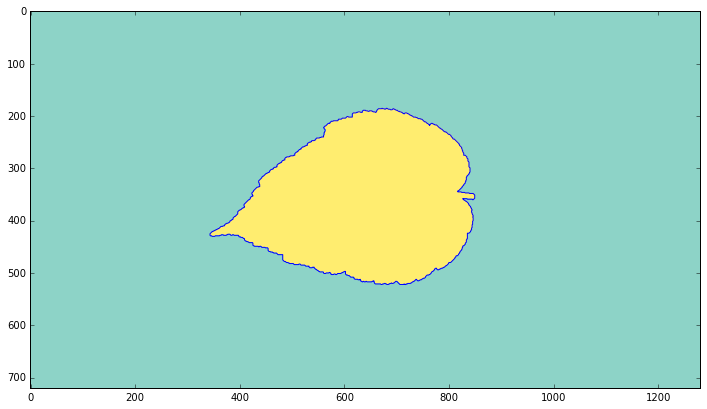

In [73]:
# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img_bin, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
fig = plt.figure(num=None, figsize=(12, 12), dpi=1200, facecolor='w', edgecolor='w',frameon=False,linewidth = 0)
plt.plot(contour[::,1], contour[::,0], linewidth=1)  # (I will explain this [::,x] later)
plt.imshow(img_bin, cmap='Set3')
plt.show()

In [74]:
contour.shape

(1907L, 2L)

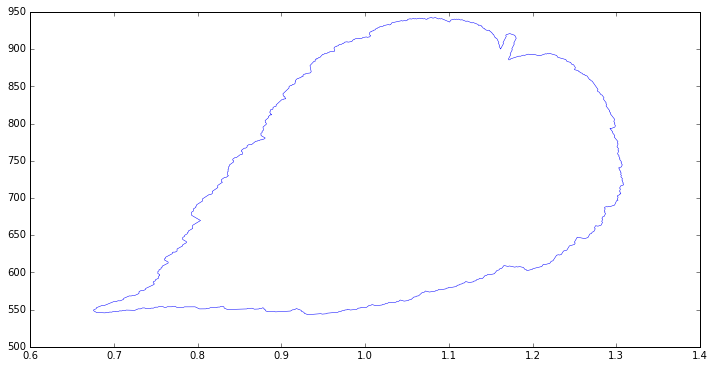

In [75]:
# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

In [76]:
# numpy BASIC indexing example, see link above for more

x = np.array([[[1,11,111], [2,22,222], [3,33,333]], 
              [[4,44,444], [5,55,555], [6,66,666]], 
              [[7,77,777], [8,88,888], [9,99,999]]])

# reverse the first dimension
# take the 0th element
# and take its last element
x[::-1, 0, -1]

array([777, 444, 111])

In [77]:
# numpy is smart and assumes the same about us
# if we substract a number from an array of numbers,
# it assumes that we wanted to substract from all members
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y

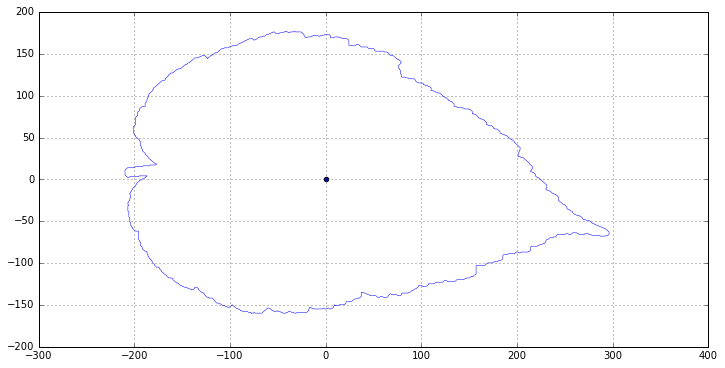

In [78]:
# checking if we succeeded to move the center to (0,0)
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

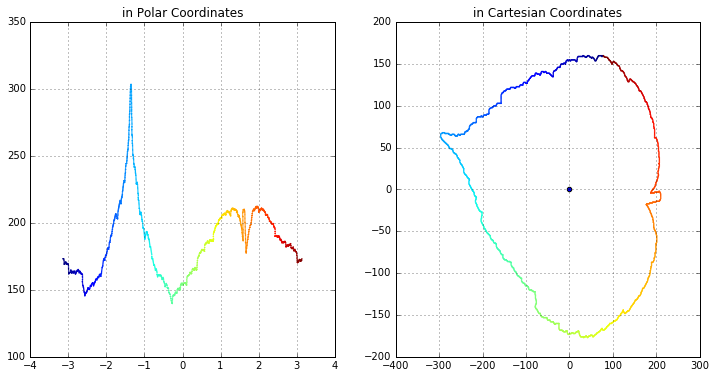

In [79]:
# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=2, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             # x axis is radians
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

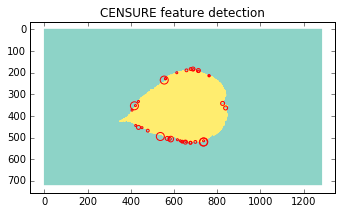

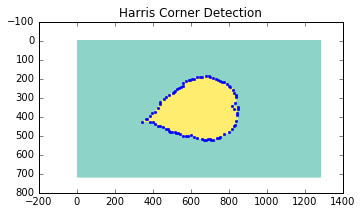

In [80]:
# check a few scikitlearn image feature extractions, if they can help us

from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img_bin)

coords = corner_peaks(corner_harris(img_bin), min_distance=5)
coords_subpix = corner_subpix(img_bin, coords, window_size=13)

plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img_bin, cmap='Set3')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.show()
plt.subplot(122)
plt.title('Harris Corner Detection');
plt.imshow(img_bin, cmap='Set3')  # show me the leaf
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
plt.show()

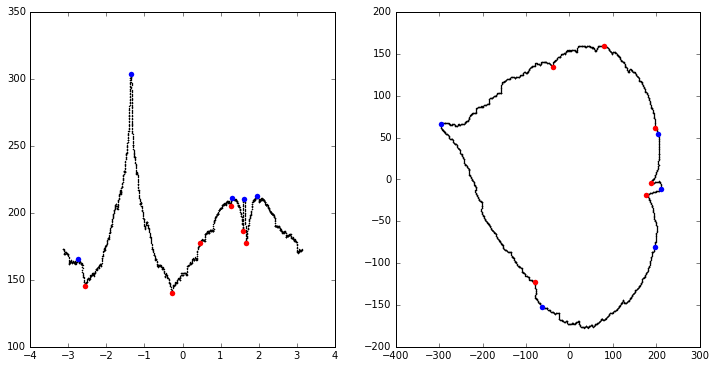

In [81]:
from scipy.signal import argrelextrema

# for local maxima
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order=50)
c_min_index = argrelextrema(polar_contour[::,0], np.less, order=50)

plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], 
            polar_contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], 
            polar_contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], 
            contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], 
            contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.show()

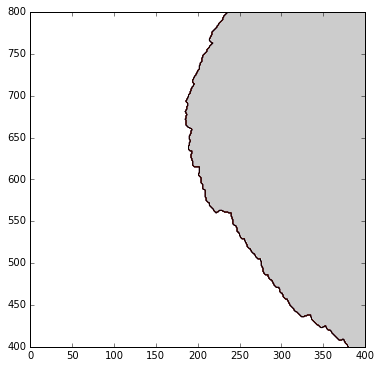

In [82]:
def cont(img):
    return max(measure.find_contours(img_bin, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]

erosion = cont(ndi.morphology.binary_erosion(img_bin, structure=struct).astype(img_bin.dtype))
closing = cont(ndi.morphology.binary_closing(img_bin, structure=struct).astype(img_bin.dtype))
opening = cont(ndi.morphology.binary_opening(img_bin, structure=struct).astype(img_bin.dtype))
dilation = cont(ndi.morphology.binary_dilation(img_bin, structure=struct).astype(img_bin.dtype))

plt.imshow(img_bin.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
#plt.xlim([220, 420])
#plt.ylim([250, 420])
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

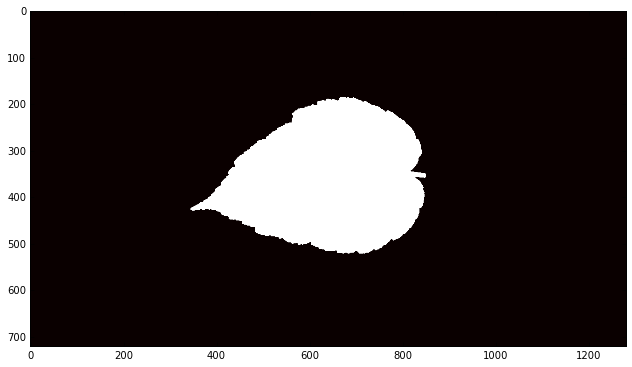

In [83]:
plt.imshow(img_bin.astype(bool).astype(float), cmap='hot')
plt.show()

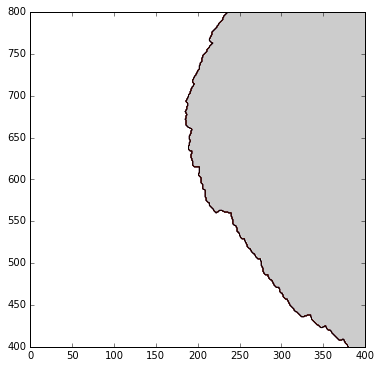

In [85]:
erosion = cont(ndi.morphology.binary_erosion(img_bin > 254, structure=struct).astype(img_bin.dtype))
closing = cont(ndi.morphology.binary_closing(img_bin > 254, structure=struct).astype(img_bin.dtype))
opening = cont(ndi.morphology.binary_opening(img_bin > 254, structure=struct).astype(img_bin.dtype))
dilation = cont(ndi.morphology.binary_dilation(img_bin > 254, structure=struct).astype(img_bin.dtype))

plt.imshow(img_bin.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

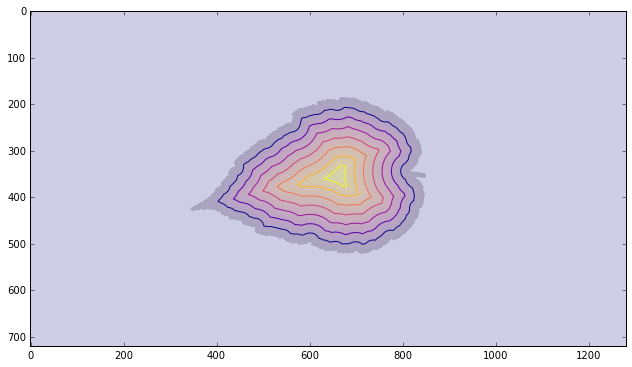

In [87]:

dist_2d = ndi.distance_transform_edt(img_bin)
plt.imshow(img_bin, cmap='Greys', alpha=.2)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.contour(dist_2d, cmap='plasma')
plt.show()

In [5]:
def leafDetect(frame):
    '''
    Detect the leaf image frame and label on it
    '''
    
    # Grayscale the image
    img_gray = grayscale(frame)

    # Gaussian
    img_blur = gaussian_blur(img_gray, kernel_size=5)
   
    # Binarization
    ret,img_bin = cv2.threshold(img_blur, 130, 255, cv2.THRESH_BINARY_INV)
    
    # Distance transformation
    img_dist = cv2.distanceTransform(img_bin, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
       
    return img_bin

# Initialize webcam, cap is the object provided by VideoCapture
# It contains a boolean indicating if it was sucessful (ret)
# It also contains the images collected from the webcam (frame)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    cv2.imshow('Leaf Recognition', leafDetect(frame))
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      